In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
from sklearn.model_selection import train_test_split

In [3]:


import os
import sys
os.chdir('C:/Users/murat.ozemre/Desktop/Thesis_Project/Data_Sources_and_Preparation')
#os.chdir('C:/Users/murat.ozemre/Documents/MOZEMRE-OZEL/Doktora/2017 Tez/Veri Analizi/Ver 3 Tez Izleme Calısmaları')

In [4]:
from sklearn import metrics
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

statsmodels: 0.8.0


In [5]:
from datetime import datetime
datetime.now().strftime('%m-%d %H:%M')

'12-27 13:40'

In [22]:
from math import sqrt
from math import log
from sklearn.ensemble import RandomForestRegressor

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [8]:
#Scaler_Type_Options = ['Normalizer', 'MinMaxScaler','MaxAbsScaler','RobustScaler','StandardScaler' ]
Scaler_Type_Options = [ 'MinMaxScaler' ]
Scalertype=Scaler_Type_Options[0]
Product_Type_Options = [841810,841840,841850]

In [9]:
Scalertype

'MinMaxScaler'

In [10]:
Product=Product_Type_Options[0] #841810
Exp_Country='TUR' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [11]:
Product

841810

In [12]:


MonthSeries="3"
MonthSeries_option=["1","2","3","6","12"]
    
    

In [13]:
Data_Core1 = pd.ExcelFile('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
y = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])['{}_{}_{}'.format(Exp_Country,Imp_Country,Product)]
Z = Data_Core1.parse('Y', header=0,index_col=None, na_values=['NA'])[['Date','Year','Month']]

X = Data_Core1.parse('X{}'.format(MonthSeries), header=0,index_col=None, na_values=['NA'])
X.drop(['Date','Year','Month'], axis=1, inplace=True)
X_Column_Names=list(X.columns.values)
n_feature=X.shape[1]

Xhat = Data_Core1.parse('Xhat', header=0,index_col=None, na_values=['NA'])
Xhat.drop(['Date','Year','Month'], axis=1, inplace=True)


In [14]:
def Xscaler(X,y,scalertype):

    if scalertype=="Normalizer":
        X=pd.DataFrame(Normalizer().fit_transform(X,y))
        print("normalize")
    elif scalertype=="MinMaxScaler":
        X=pd.DataFrame(MinMaxScaler().fit_transform(X,y))
        print("minmax")
    elif scalertype=="MaxAbsScaler":
        X=pd.DataFrame(MaxAbsScaler().fit_transform(X,y))
        print("maxabs")
    elif scalertype=="RobustScaler":
        X=pd.DataFrame(RobustScaler().fit_transform(X,y))
    elif scalertype=="StandardScaler":
        X=pd.DataFrame(StandardScaler().fit_transform(X,y))
    return X

Scaling Min Max and then spilt test and train according stratify to month.

In [15]:
def X_Y_scaler_train_test_Split(X,y,Z,random=42):

    values = X.values
    values = values.astype('float32')
    X_Column_X_Column_Names=X.columns
    
    scaler_X= MinMaxScaler(feature_range=(0, 1))

    scaled_value_X = scaler_X.fit_transform(values)
    scaled_value_X = pd.DataFrame(data=scaled_value_X[:,:])
    scaled_value_X.columns=X_Column_X_Column_Names
    
    values = y.values
    values = values.astype('float32')
    values = values.reshape(-1, 1)
    
    scaler_y= MinMaxScaler(feature_range=(0, 1))

    scaled_value_y = scaler_y.fit_transform(values)
    scaled_value_y = pd.DataFrame(data=scaled_value_y)

    X_train, X_test, y_train, y_test = train_test_split(scaled_value_X,scaled_value_y,test_size=0.2,random_state=42,stratify=Z['Month'])

    return X_train, X_test, y_train, y_test, scaler_X, scaler_y, scaled_value_X, scaled_value_y


In [46]:
def inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,plot_on):

    y_predict_test=y_predict_test.reshape(-1, 1)
    inv_y_predict_test = scaler_y.inverse_transform(y_predict_test)
    predictions=inv_y_predict_test

  
    inv_y_test = scaler_y.inverse_transform(y_test)
    inv_y_test = inv_y_test[:,0]

    MAE=int(metrics.mean_absolute_error(inv_y_test, predictions))
    MSE=int(sqrt(metrics.mean_squared_error(inv_y_test, predictions)))
    R2=int(1000*(metrics.r2_score(inv_y_test, predictions)))/1000
    
    
    print('MAE',MAE, 'MSE',MSE, 'R2',R2 )
    
    if plot_on =='YES':
        plt.scatter(inv_y_test,predictions)
    
    return MAE,MSE,R2
    


In [47]:
a=[1,2,3,4,5]
b=[2,2,2,2,2]

a=np.log(a)
b=np.log(b)
R2=int(1000*(metrics.r2_score(a , b )))/1000
R2

-0.216

In [17]:
Scaled_Train_Test_Split=X_Y_scaler_train_test_Split(X,y,Z)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]

In [18]:
# For Random Forest with variable tuning 

def randomforest(X_train, X_test, y_train, y_test,scaler_y,est=10,min_leaf=1,random=50,feat='auto',max_leaf=None,min_weight=0.0,min_impurity=1e-07):
    from sklearn.model_selection import cross_val_score   
    from sklearn.model_selection import cross_val_predict
    
    rfc=RandomForestRegressor(n_estimators=est,
                              min_samples_leaf=min_leaf,
                              random_state =random,
                              max_features=feat,
                              max_leaf_nodes=max_leaf,
                              min_weight_fraction_leaf =min_weight,
                              min_impurity_decrease=min_impurity
                            )
   
    RandomForestRegressor.fit(rfc,X_train,y_train)

    y_predict_test = rfc.predict(X_test)
    y_predict_train = rfc.predict(X_train)
    
    result_test=inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO')
    result_train=inverse_scale_and_graph_Y_predict_and_test(y_predict_train,y_train,scaler_y,'NO')
    
    return result_test, result_train




MAE 2569 MSE 3522 R2 0.444


(2569, 3522, 0.444)

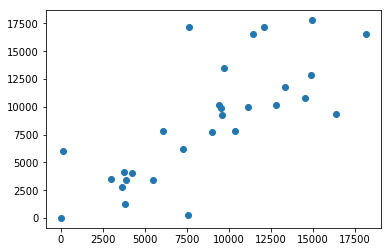

In [45]:
from sklearn.tree import DecisionTreeRegressor

# Decison tree regressor model
dt = DecisionTreeRegressor()

# Decison tree regressor model train
DecisionTreeRegressor.fit(dt,X_train,y_train)

# Decison tree regressor model predict
y_predict_test = dt.predict(X_test)

# Compare predicted Y and real Y 
inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')


In [ ]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'YES')

In [ ]:
rfc.feature_importances_

In [ ]:
rfc.score(X,y)

In [ ]:
# 1 Version for Feature selection
# Internetten bulunan kod blogu
# Random Forest'a gore Feature Importance Hesaplama
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

ScalerType = Scalertype=Scaler_Type_Options[0]
n_sample=len(X)

rfc=RandomForestRegressor(n_estimators=3000)
RandomForestRegressor.fit(rfc,scaled_value_X,scaled_value_y)


predictions = rfc.predict(X_test)
print('MAE',int(metrics.mean_absolute_error(y_test, predictions)),
      'MSE',int(sqrt(metrics.mean_squared_error(y_test, predictions))),
      'R2',int(1000*(metrics.r2_score(y_test, predictions)))/1000
     )


importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

indices = np.argsort(importances)[::-1]


# Print the feature ranking
print("Feature ranking:")

for f in range(n_feature):
    print("%d. feature %s %d (%f) %f" % (f+1, X_Column_Names[indices[f]], indices[f], importances[indices[f]],std[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations".format(Product,MonthSeries))
plt.bar(range(n_feature), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(n_feature), indices,rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Feature Importances and Standart Deviation of Features with 3000 Different Estimations.png".format(Product,MonthSeries), format='png', dpi=300)

plt.show()

In [ ]:
#  2 Version for Feature selection 
# Internetten bulunan kod blogu http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
# Feature Importance Hesaplama
# Burada asıl özellik bir veri seti yaratılıyor make_regression ile. Ve oaradakilere dogru çalışıp çalışmadığı test ediliyor.
# Butun veri setinin girildiği ona göre önemli olan özelliklerin bulundugu kod parçası

from sklearn.datasets import make_regression


n_sample=len(X)

number_of_split=100
number_of_row=29

random_state_options = np.arange(0,number_of_split)
y_predict= np.ones((number_of_row, number_of_split))

feature_indices = np.ones((n_feature, number_of_split))
feature_importances=np.ones((n_feature, number_of_split))
feature_indices_score=np.ones((n_feature))
feature_importances_score=np.ones((n_feature))
j=0


# For different split sets Random Forest Regressor runs.

for random_state_i in random_state_options:

    X_train, X_test, y_train, y_test = train_test_split(scaled_value_X,scaled_value_y,test_size=0.2,random_state=random_state_i,stratify=Z['Month'])

    

    rfc=RandomForestRegressor(n_estimators=30)
    RandomForestRegressor.fit(rfc,X_train,y_train)

    y_predict[:,j] = rfc.predict(X_test)
    
    result=inverse_scale_and_graph_Y_predict_and_test (y_predict[:,j],y_test,scaler_y,'NO')
    
    importances = rfc.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

    indices = np.argsort(importances)[::-1]
    feature_indices[:,j]=indices
    feature_importances[:,j]=importances
    j=j+1
    

print ("Features scores:")    
for i in range(n_feature):
    feature_indices_score[i]=0
    feature_importances_score[i]=0
    for j in range(number_of_split):
        
        indice_coeff=feature_indices[i,j]
        importances_coeff=feature_importances[i,j]
        
        feature_indices_score[i]=feature_indices_score[i]+(indice_coeff)
        feature_importances_score[i]=feature_importances_score[i]+(importances_coeff)
        
#        print('feat=',i,'#ofsplit=',j,'tot_indice',feature_indices_score[i],
#              'indice=',indice_coeff,'tot_importan=',feature_importances_score[i],'importan',importances_coeff )

    print( i,X_Column_Names[i])#,feature_indices_score[i],'number_of_split',j+1) #,X_Column_Names[feature_indices[i,j]])
    
scored_feature_indices = np.argsort(feature_indices_score)
scored_feature_importances = np.argsort(feature_importances_score)
    
 
    
    
# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split))
plt.bar(range(n_feature), feature_importances_score[scored_feature_importances][::-1],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_importances[::-1],rotation=90)
plt.xlim([-1, n_feature])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and -{} Month Cumulative Feature Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split), format='png', dpi=300)

plt.show()

In [ ]:
# 3 Version for Train Test Split and Feature selection 
# http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
# Use both RF Importances and R2 Accuracy with different number of splits

from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict
from operator import itemgetter, attrgetter

def getKey(item):
    return item[0]

rf = RandomForestRegressor()


number_of_split=100
number_of_row=29



random_state_options = np.arange(0,number_of_split)
predictions= np.ones((number_of_row, number_of_split))
y_predict= np.ones((number_of_row, number_of_split))

feature_indices = np.ones((n_feature, number_of_split))
feature_importances=np.ones((n_feature, number_of_split))
feature_indices_score=np.ones((n_feature))
feature_importances_score=np.ones((n_feature))

scores = defaultdict(list)
#feature_indices = 
feature_std = np.ones((n_feature, number_of_split))
feature_score=np.zeros((n_feature))

#R2=defaultdict(list)
R2=np.ones(number_of_split)
j=0

sonuc =[]


for random_state_i in random_state_options:

    X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2,random_state=random_state_i,stratify=Z['Month'])

    RandomForestRegressor.fit(rf,X_train, Y_train)    

    y_predict[:,j] = rf.predict(X_test)
    
    acc = int(1000*(r2_score(Y_test, rf.predict(X_test))))/1000
    R2[j] = int(1000*(r2_score(Y_test, rf.predict(X_test))))/1000
        
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)


    feature_importances[:,j]=importances
    feature_indices[:,j]=indices
    feature_std [:,j]=std

    j=j+1

R2_Adj=1-R2
score_coefficient=n_feature*(R2_Adj - np.max(R2_Adj))/-np.ptp(R2_Adj)

    
print ("Features scores:")    
for i in range(n_feature):
    feature_score[i]=0
    feature_indices_score[i]=0
    feature_importances_score[i]=0
    
    for j in range(number_of_split):
        
        indice_coeff=feature_indices[i,j]+1
        importances_coeff=int((feature_importances[i,j]*10000))/10000
        score_coeff=int((score_coefficient[j]+1)*10)/10

        feature_indices_score[i]=feature_indices_score[i]+(indice_coeff)
        feature_importances_score[i]=feature_importances_score[i]+(importances_coeff)

        score=score_coeff*(importances_coeff)
        feature_score[i]=feature_score[i]+score


#    print( feature_score[i],'number_of_split',j+1) #,X_Column_Names[feature_indices[i,j]])
    
scored_feature_indices = (np.argsort(feature_score)[::-1])

for f in range(n_feature):
    print("%d. feature %s %d (%f) %f" % (f+1, X_Column_Names[scored_feature_indices[f]], scored_feature_indices[f], importances[scored_feature_indices[f]],std[scored_feature_indices[f]]))


# Plot the feature importances of the forest
plt.gcf().clear()
plt.figure()
plt.title("{} and {} Month Cumulative Feature and Score Importances with {} Different Splits".format(Product,MonthSeries,number_of_split))
plt.bar(range(n_feature), feature_score[scored_feature_indices],
       color="r",  align="center")
plt.xticks(range(n_feature), scored_feature_indices,rotation=90)
plt.xlim([-1, n_feature])

#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 20
#fig_size[1] = 12
#plt.rcParams["figure.figsize"] = fig_size
plt.savefig("Plots_Feature_Selection/{} and {} Month Cumulative Feature and Score Importances with {} Different Splits.png".format(Product,MonthSeries,number_of_split), format='png', dpi=300)

plt.show()


        

In [ ]:
# Calling function by single parameter set 
a=randomforest(X_train, X_test, y_train, y_test,scaler_y,200,5,10,10,5,0.1,0.01)

In [ ]:
# By using Ver 3 for Feature Selection results
# Percentile variable takes the most important variables according to its feature score and omits the others.
# ie.25 percentile takes %75 importance variables and omits %25 least important features

percentile=25
threshold_for_feature_selection=np.percentile(feature_score[scored_feature_indices], percentile)
X_threshold=X.iloc[:,scored_feature_indices[feature_score[scored_feature_indices]>threshold_for_feature_selection]]

# Train Test Split after percentile selection

Scaled_Train_Test_Split=X_Y_scaler_train_test_Split(X_threshold,y,Z)

X_train = Scaled_Train_Test_Split[0]
X_test = Scaled_Train_Test_Split[1]
y_train = Scaled_Train_Test_Split[2]
y_test = Scaled_Train_Test_Split[3]
scaler_X = Scaled_Train_Test_Split[4]  
scaler_y = Scaled_Train_Test_Split[5]
scaled_value_X=Scaled_Train_Test_Split[6]
scaled_value_y=Scaled_Train_Test_Split[7]


In [ ]:
# Random Foest Regressor model
rfc=RandomForestRegressor(n_estimators=3000,random_state=50)

# Random Foest Regressor model train
RandomForestRegressor.fit(rfc,X_train,y_train)

# Random Foest Regressor mode predict
y_predict_test = rfc.predict(X_test)

# Compare predicted Y and real Y 
inverse_scale_and_graph_Y_predict_and_test(y_predict_test,y_test,scaler_y,'NO')

In [ ]:
randomforest(X_train, X_test, y_train, y_test,scaler_y,est=3000,random=50)